# Treasury Yield Curve

In [137]:
import yfinance as yf
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen, Request
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [138]:
# Read in Treasury yields 1990-2021 from US Department of Treasury website
yield_data_1990_2021 = pd.read_csv('resources/yield-curve-rates-1990-2021.csv')
yield_data_1990_2021['Date'] = pd.to_datetime(yield_data_1990_2021["Date"])
yield_data_1990_2021 = yield_data_1990_2021.set_index('Date').sort_index()
yield_data_1990_2021

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96


In [139]:
# Treasury yields for 2022 from US Department of Treasury website (updated daily) 
url = ("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022")
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")
yield_data_2022 = pd.read_html(str(html), attrs = {'class':'views-table views-view-table cols-20'})[0]
yield_data_2022 = yield_data_2022.drop(yield_data_2022.columns[[1,2,3,4,5,6,7]],axis=1)
yield_data_2022['Date'] = pd.to_datetime(yield_data_2022['Date'])
yield_data_2022 = yield_data_2022.set_index('Date')
yield_data_2022.tail()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-09-19,2.62,3.02,3.37,3.87,4.05,3.95,3.90,3.69,3.62,3.49,3.77,3.52
2022-09-20,2.57,3.05,3.35,3.86,4.03,3.96,3.94,3.75,3.69,3.57,3.83,3.59
2022-09-21,2.59,3.06,3.31,3.86,4.08,4.02,3.98,3.74,3.65,3.51,3.73,3.50
2022-09-22,2.73,3.09,3.29,3.87,4.08,4.11,4.12,3.91,3.84,3.70,3.90,3.65
2022-09-23,2.67,3.07,3.24,3.85,4.15,4.20,4.21,3.96,3.85,3.69,3.87,3.61


In [140]:
yield_data = pd.concat([yield_data_1990_2021, yield_data_2022],axis=0)
yield_data.tail()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-09-19,2.62,3.02,3.37,3.87,4.05,3.95,3.90,3.69,3.62,3.49,3.77,3.52
2022-09-20,2.57,3.05,3.35,3.86,4.03,3.96,3.94,3.75,3.69,3.57,3.83,3.59
2022-09-21,2.59,3.06,3.31,3.86,4.08,4.02,3.98,3.74,3.65,3.51,3.73,3.50
2022-09-22,2.73,3.09,3.29,3.87,4.08,4.11,4.12,3.91,3.84,3.70,3.90,3.65
2022-09-23,2.67,3.07,3.24,3.85,4.15,4.20,4.21,3.96,3.85,3.69,3.87,3.61


In [141]:
# Select yields to analyze
yield_curve = yield_data[['3 Mo','2 Yr','10 Yr','20 Yr']]
yield_curve.tail()

,3 Mo,2 Yr,10 Yr,20 Yr
Date,,,,
2022-09-19,3.37,3.95,3.49,3.77
2022-09-20,3.35,3.96,3.57,3.83
2022-09-21,3.31,4.02,3.51,3.73
2022-09-22,3.29,4.11,3.70,3.90
2022-09-23,3.24,4.20,3.69,3.87


In [142]:
# Set yield frequency as monthly
yield_curve = yield_curve.asfreq(freq='M').ffill()
yield_curve = yield_curve.loc['1990':]
yield_curve.tail()

,3 Mo,2 Yr,10 Yr,20 Yr
Date,,,,
2022-04-30,0.52,2.28,2.32,2.59
2022-05-31,1.16,2.53,2.85,3.28
2022-06-30,1.72,2.92,2.98,3.38
2022-07-31,1.72,2.92,2.98,3.38
2022-08-31,2.96,3.45,3.15,3.53


<AxesSubplot:title={'center':'US Treasury Yield'}, xlabel='Date', ylabel='%'>

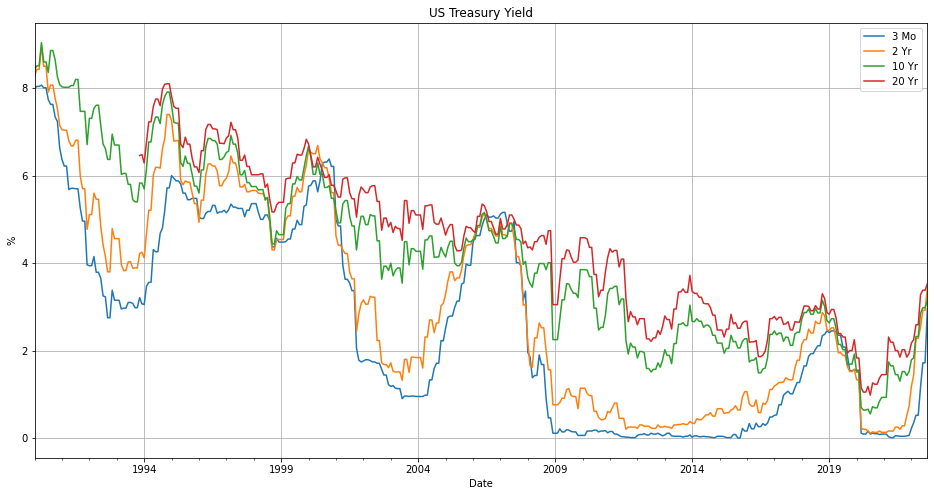

In [143]:
# Plot US Tresury yield curves
yield_curve.plot(figsize = (16,8), title = 'US Treasury Yield', ylabel = '%', grid=True)

In [144]:
# Create the difference between the long and short yield curve; You may select different long term yields (10YR, 20YR etc.)
long_short_diff = yield_curve['10 Yr'] - yield_curve['3 Mo']
long_short_diff.tail()

Date
2022-04-30    1.80
2022-05-31    1.69
2022-06-30    1.26
2022-07-31    1.26
2022-08-31    0.19
Freq: M, dtype: float64

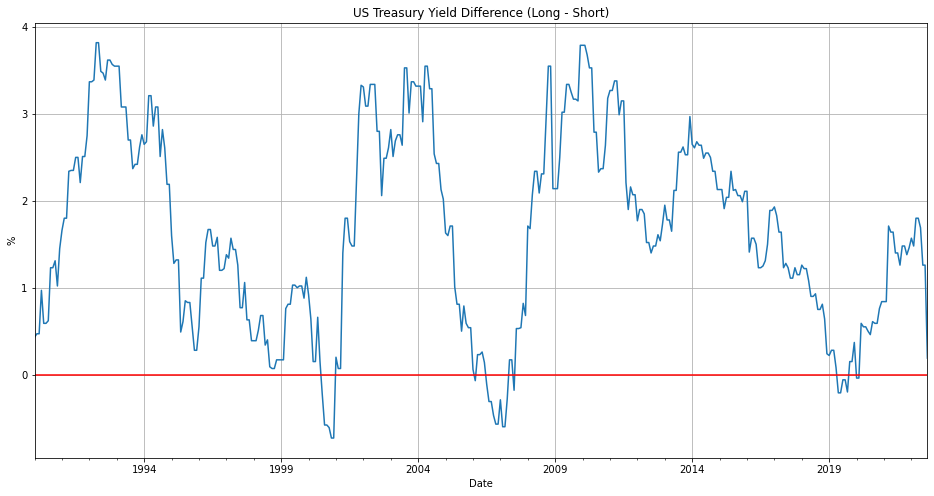

In [145]:
# Plot the difference between the long and short yield curve to identify inverted curve (y value below 0)
long_short_plot = long_short_diff.plot(figsize = (16,8), title = 'US Treasury Yield Difference (Long - Short)', ylabel = '%', grid=True)
plt.axhline(0, c='r')

In [146]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-08-31"

sp_history = yf.download(ticker, start=start, end=end, progress=False)

In [147]:
# Set frequency to Monthly; Forward fill missing values
sp_history = sp_history['Adj Close'].asfreq(freq='M').ffill()
sp_history.tail()

Date
2022-03-31    4530.410156
2022-04-30    4530.410156
2022-05-31    4132.149902
2022-06-30    3785.379883
2022-07-31    3785.379883
Freq: M, Name: Adj Close, dtype: float64

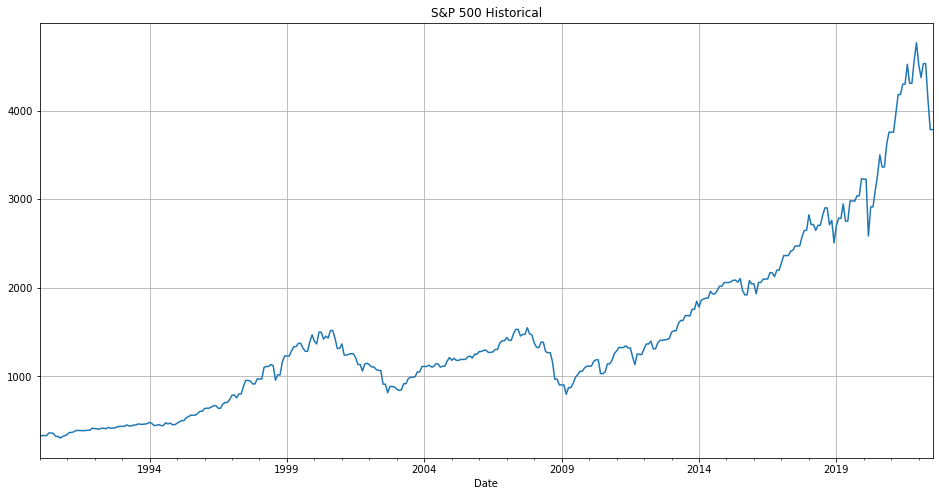

In [148]:
# Plot S&P Index historical data
sp_plot = sp_history.plot(figsize=(16,8), title='S&P 500 Historical', grid=True)

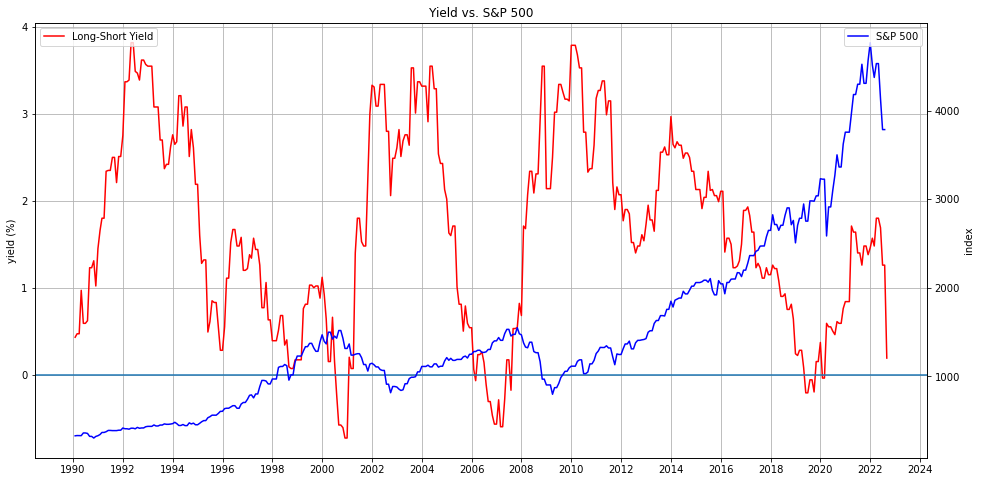

In [149]:
# Long-Short Yield Curve below 0 shows inverted curve.
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(long_short_diff, label ='Long-Short Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax2 = ax.twinx()
plt.plot(sp_history, label='S&P 500', color='b')
ax.set_title('Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')

# 10-Year TIPS vs Treasury Bond Yield
### The yield spread between the 10-year Treasury and the TIPS bond can be viewed as the bond market's expectation for inflation as measured by the Consumer Price Index.

In [150]:
# Read in Real Constant Maturity Treasury yields 2003-2021 from US Department of Treasury website 
yield_real_data_2003_2021 = pd.read_csv('resources/par-real-yield-curve-rates-2003-2021.csv').drop(columns=['5 YR','7 YR', '20 YR', '30 YR']).rename(columns={'10 YR':'10 Yr Real'})
yield_real_data_2003_2021['Date'] = pd.to_datetime(yield_real_data_2003_2021["Date"])
yield_real_data_2003_2021 = yield_real_data_2003_2021.set_index('Date').sort_index()
yield_real_data_2003_2021.tail()

,10 Yr Real
Date,
2021-12-27,-1.02
2021-12-28,-1.01
2021-12-29,-0.98
2021-12-30,-1.06
2021-12-31,-1.04


In [151]:
# Real Constant Maturity Treasury yields for year 2022 from US Department of Treasury website (updated daily)
url = ("https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_real_yield_curve&field_tdr_date_value=2022")
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")
yield_real_data_2022 = pd.read_html(str(html), attrs = {'class':'views-table views-view-table cols-16'})[0]
yield_real_data_2022 = yield_real_data_2022.drop(yield_real_data_2022.columns[[6,7,8,9,10,11,12,13,14,15]],axis=1)
yield_real_data_2022['Date'] = pd.to_datetime(yield_real_data_2022['Date'])
yield_real_data_2022 = yield_real_data_2022.set_index('Date').drop(columns=['5 YR','7 YR', '20 YR', '30 YR']).rename(columns={'10 YR':'10 Yr Real'})
yield_real_data_2022.tail()

,10 Yr Real
Date,
2022-09-19,1.15
2022-09-20,1.17
2022-09-21,1.13
2022-09-22,1.29
2022-09-23,1.32


In [152]:
yield_real_data = pd.concat([yield_real_data_2003_2021, yield_real_data_2022])
yield_real_data

,10 Yr Real
Date,
2003-01-02,2.43
2003-01-03,2.43
2003-01-06,2.46
2003-01-07,2.42
2003-01-08,2.29
...,...
2022-09-19,1.15
2022-09-20,1.17
2022-09-21,1.13


In [153]:
# Difference between nominal 10 year yield
yield_data['10 YR Real'] = yield_real_data['10 Yr Real']
yield_data['10_Yr_diff'] = yield_data['10 Yr'] - yield_data['10 YR Real']
yield_data[['10 YR Real','10_Yr_diff']].tail()

,10 YR Real,10_Yr_diff
Date,,
2022-09-19,1.15,2.34
2022-09-20,1.17,2.40
2022-09-21,1.13,2.38
2022-09-22,1.29,2.41
2022-09-23,1.32,2.37


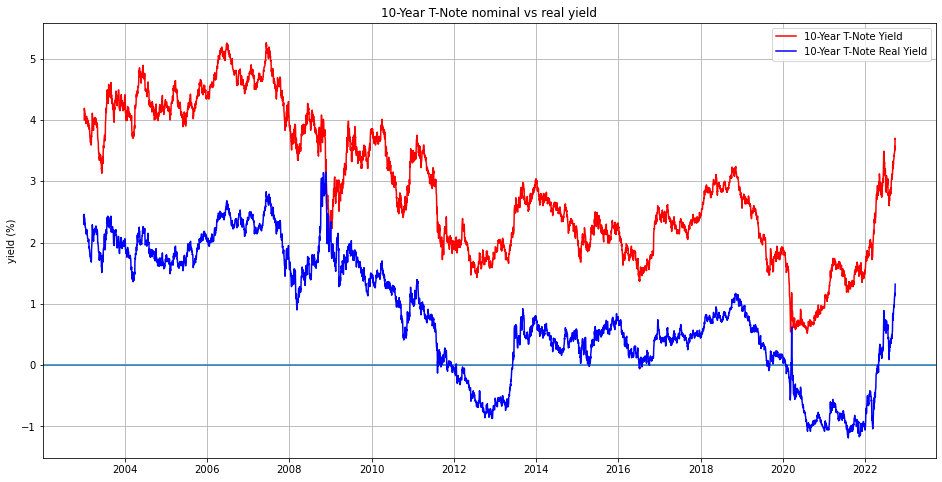

In [154]:
# Plot 10-year Treasury yield vs real yield
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(yield_data['10 Yr'].loc['2003-01-08':], label ='10-Year T-Note Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')

plt.plot(yield_data['10 YR Real'], label ='10-Year T-Note Real Yield', color='b')
ax.set_ylabel('yield (%)')
ax.legend(loc='upper right')

plt.title('10-Year T-Note nominal vs real yield')
ax.xaxis.set_major_locator(mdates.YearLocator(2))

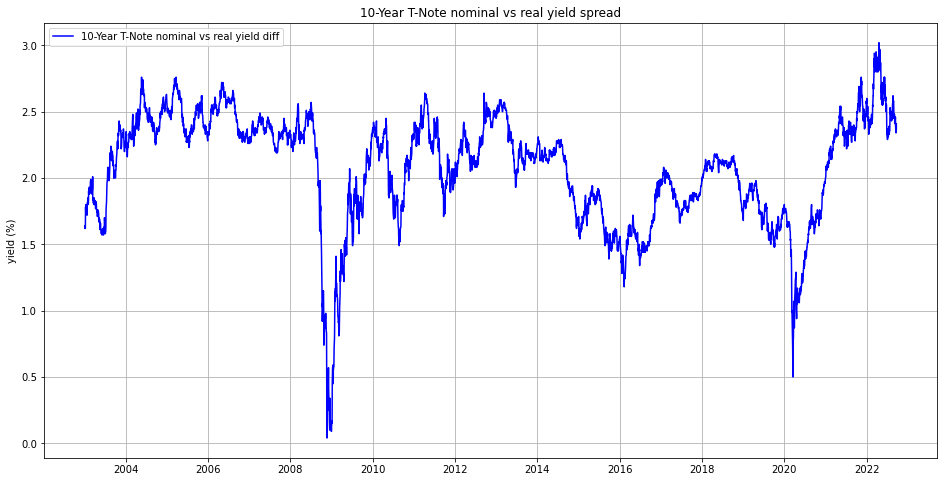

In [155]:
# Plot the difference between nominal and real 10-Year Tresury Yield
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(yield_data['10_Yr_diff'], label ='10-Year T-Note nominal vs real yield diff', color='b')
ax.set_ylabel('yield (%)')
plt.grid()
ax.legend(loc='upper left')
plt.title('10-Year T-Note nominal vs real yield spread')
ax.xaxis.set_major_locator(mdates.YearLocator(2))